In [5]:
X_tr.shape, y_tr.shape

((60000, 28, 28), (60000,))

In [6]:
X_te.shape, y_te.shape

((10000, 28, 28), (10000,))

Text(0.5, 1.0, '0')

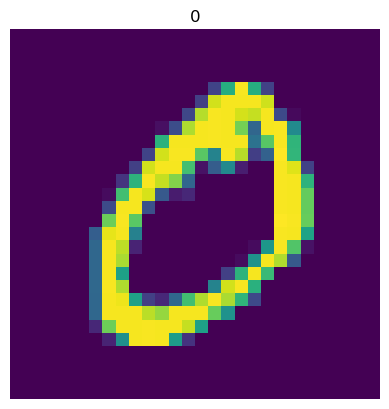

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.imshow(X_tr[1])
ax.set_axis_off()
ax.set_title(f'{y_tr[1]}')

<AxesSubplot:>

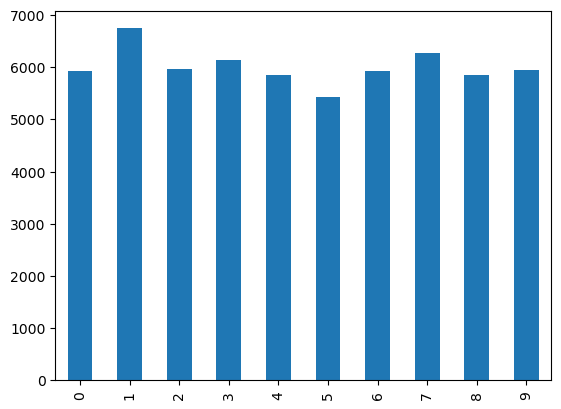

In [15]:
import numpy as np
import pandas as pd

v, c = np.unique(y_tr, return_counts=True)
s = pd.Series(c, index=v)
s.plot(kind='bar')

<AxesSubplot:>

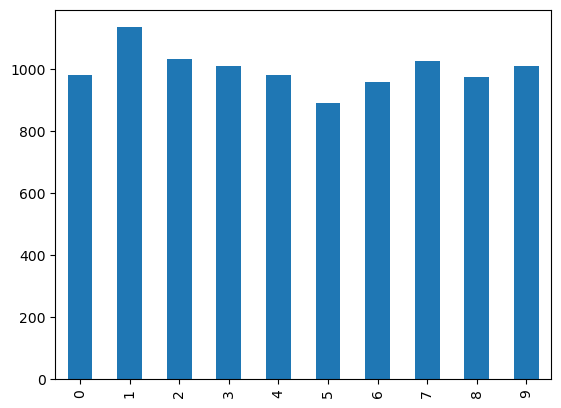

In [16]:
v, c = np.unique(y_te, return_counts=True)
s = pd.Series(c, index=v)
s.plot(kind='bar')

In [22]:
from pathlib import Path

v, _ = np.unique(y_tr, return_counts=True)
for number in v:
    Path(f'./data/mnist/te/{number:02}').mkdir(parents=True, exist_ok=True)
    Path(f'./data/mnist/tr/{number:02}').mkdir(parents=True, exist_ok=True)

In [33]:
import cv2

counter = {int(num): 0 for num in v}

for img, y in zip(X_tr, y_tr):
    count = counter[int(y)]
    p = f'./data/mnist/tr/{y:02}/{count:05}.png'
    cv2.imwrite(p, img)
    
    counter[int(y)] += 1

In [34]:
counter

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [35]:
counter = {int(num): 0 for num in v}

for img, y in zip(X_te, y_te):
    count = counter[int(y)]
    p = f'./data/mnist/te/{y:02}/{count:05}.png'
    cv2.imwrite(p, img)
    
    counter[int(y)] += 1

In [36]:
counter

{0: 980,
 1: 1135,
 2: 1032,
 3: 1010,
 4: 982,
 5: 892,
 6: 958,
 7: 1028,
 8: 974,
 9: 1009}

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

X_tr = ImageDataGenerator(preprocessing_function=preprocess_input) \
        .flow_from_directory(
            'input-1/tr',
            target_size=(36, 72),
            batch_size=32,
            shuffle=True,
            seed=37,
            color_mode='grayscale',
            class_mode='categorical'
        )

X_te = ImageDataGenerator(preprocessing_function=preprocess_input) \
        .flow_from_directory(
            'input-1/te',
            target_size=(36, 72),
            batch_size=32,
            shuffle=True,
            seed=37,
            color_mode='grayscale',
            class_mode='categorical'
        )

n_clasess = len(X_tr.class_indices.values())

In [ ]:
type(X_te)

In [ ]:
from keras.applications.mobilenet import MobileNet
import keras.optimizers

def get_model(n_clasess: int, 
              weights=None, 
              image_height: int = 36, 
              image_width: int = 72, 
              include_top: bool = True, 
              loss: str = 'categorical_crossentropy', 
              metric: str = 'accuracy', 
              learning_rate: float = 3e-4):
    model = MobileNet(
        classes=n_clasess,
        weights=weights,
        input_shape=(image_height, image_width, 1),
        include_top=include_top
    )
    
    model.compile(
        loss=loss,
        optimizer=keras.optimizers.adam_v2.Adam(learning_rate=learning_rate),
        metrics=[metric]
    )
    
    return model

model = get_model(n_clasess)

In [ ]:
history = model.fit(
    x=X_tr,
    validation_split=0.1,
    epochs=1
)

In [ ]:
??model.fit